# Laboratorio 5
## Alexander Espinosa Montoya

#### 2. Transformada Z
1.Considere las siguientes sistemas representados con ecuaciones en diferencias. Elija una ecuacion de acuerdo a su
ultimo numero de cedula, aplique la transformada Z y halle la funcion de transferencia del sistema.

0. y[n] = y[n −1] + 0,5y[n −1] + x[n −2] −10x[n −3]

Para la trasformada, se utiliza el desplazamiento temporal, despues se expresa en Y(z)/X(z) 
multiplico por el maximo exponente de z arriba y abajo y obtengo la funcion de trasferencia

Y(z) = z - 10
X(z) = z^3 - 1.5 z^2

Se adjunta foto del proceso

Para desarrollar el laboratorio es necesario representar el numerador y denominador de la funcion de transferencia
usando listas en python.
Nota: Recuerde que las listas solo contienen los coeficientes de los polinomios de Z ordenados de mayor a menor
orden.
1. Importe las funciones del archivo adjunto ztrans.py y uselas para graficar la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalon, y el diagrama de polos y ceros.

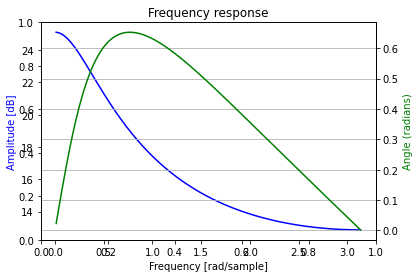

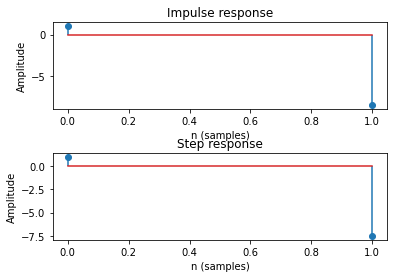

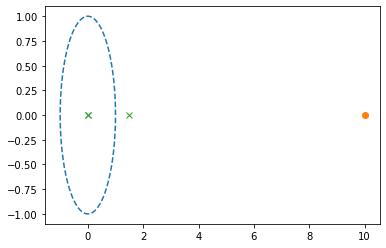

In [1]:
import ztrans  #importar de un archivo util.py

n = [1,-10] #numerado
d = [1,-1.5,0,0] #denominador

ztrans.mfreqz(n,d); #respuesta en frecuencia y fase
ztrans.impz(n,d); #respuesta al impulso y escalon
ztrans.zeropoles(n,d); #diagrama de polos y ceros


2. ¿Donde estan ubicados los polos y los ceros?
R: Polos = {1.5,0}  ceros = {10}
3. ¿Que se puede decir de la respuesta en frecuencia y fase de la funcion de transferencia?
no se comporta de manera lineal y en fase se comporta como pasabajas
4. ¿Que se puede decir acerca de la respuesta al impulso y al escalon?
La respuesta del sitema al impulso, es la respuesta del sistema al escalon, por eso son iguales
5. ¿Que se puede decir acerca de la estabilidad del sistema?
ya que se presenta polos fuera de la region unitaria, y dentro de la region unitario hay un polo
el sistema es causal inestable

#### 3. Transformada Z: Introduccion a los filtros digitales
1. Genere una senal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadratica. La senal debe tener una duracion de 20 segundos y debe tener una frecuencia de muestreo de 6000 Hz.
2. Grafique y escuche la senal ¿Que se puede decir acerca del audio?

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/1258518099.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal seno",FontSize=15) #titulo


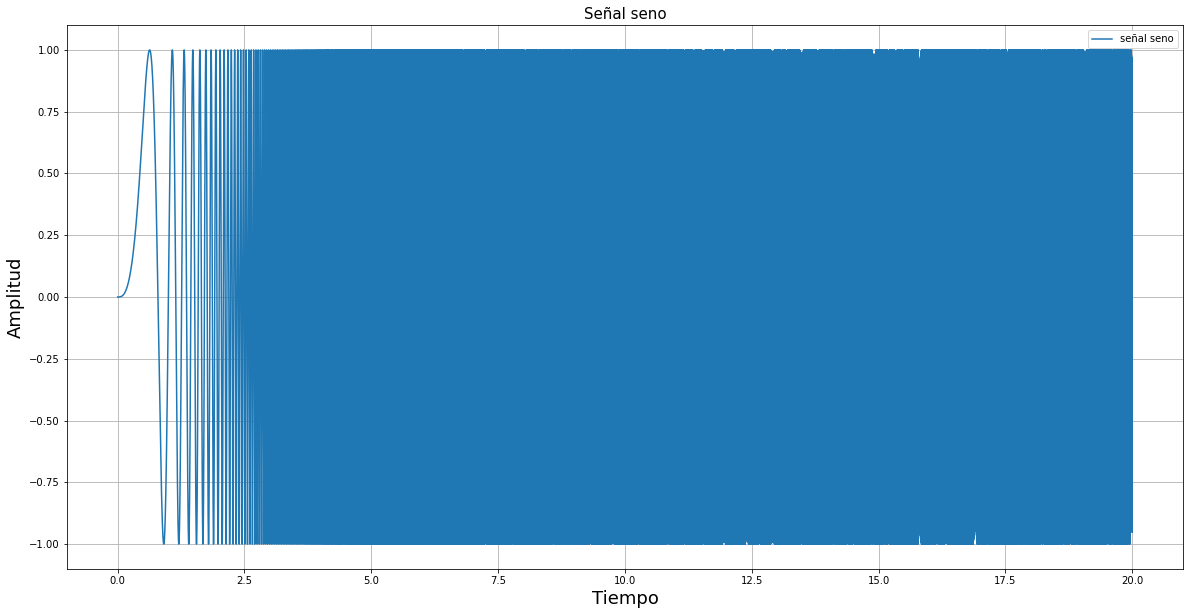

In [2]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la señal
import matplotlib.pyplot as plt # Libreria para graficar
import numpy as np

fs = 6000
t = np.arange(0,20,1/fs)
f = pow(t,2) #con esto hacemos que la frecuncia aumente de forma cuadratica
senal_fc = np.sin(2*np.pi*f*t)

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,senal_fc, label="señal seno") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal seno",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

Audio(senal_fc,rate=fs)


¿Que se puede decir acerca del audio?
R: se escucha un barrido de frecuencias, desde sonidos en baja frecuencia a alta frecuencia

3. Genere la funcion de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes instrucciones.

In [3]:
import scipy.signal as signal
n = 9
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

4. Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalon, y el diagrama de polos y ceros del filtro FIR.

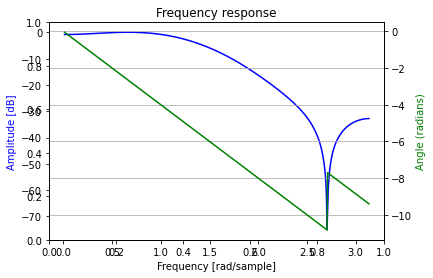

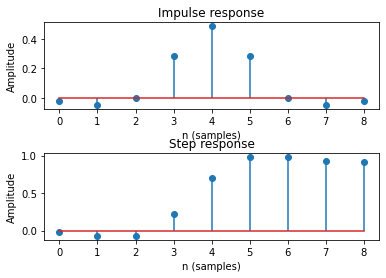

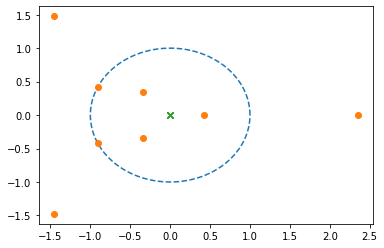

In [4]:
ztrans.mfreqz(num,den); #respuesta en frecuencia y fase
ztrans.impz(num,den); #respuesta al impulso y escalon
ztrans.zeropoles(num,den); #diagrama de polos y ceros

5. ¿Que puede concluir acerca de las graficas anteriores?
¿Que tipo de filtro es?
R: Es un filtro pasabandas
¿Cuales son las frecuencias de corte?
R: cerca de los 2.5 rad
¿Donde estan ubicados los polos y ceros?
Polos = {0}, Ceros = {2.4, 0.4} y 3 complejos en -0.4, -0.9 -1.4 aprox
¿Que puede decir de la estabilidad del filtro?
R: es causal estable

6. Calcule la respuesta del filtro ante la senal generada previamente. Grafique la senal antes y 
despues de pasar por el filtro. ¿Que le ocurrio a la senal?

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/1089208845.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal despues del filtro",FontSize=15) #titulo


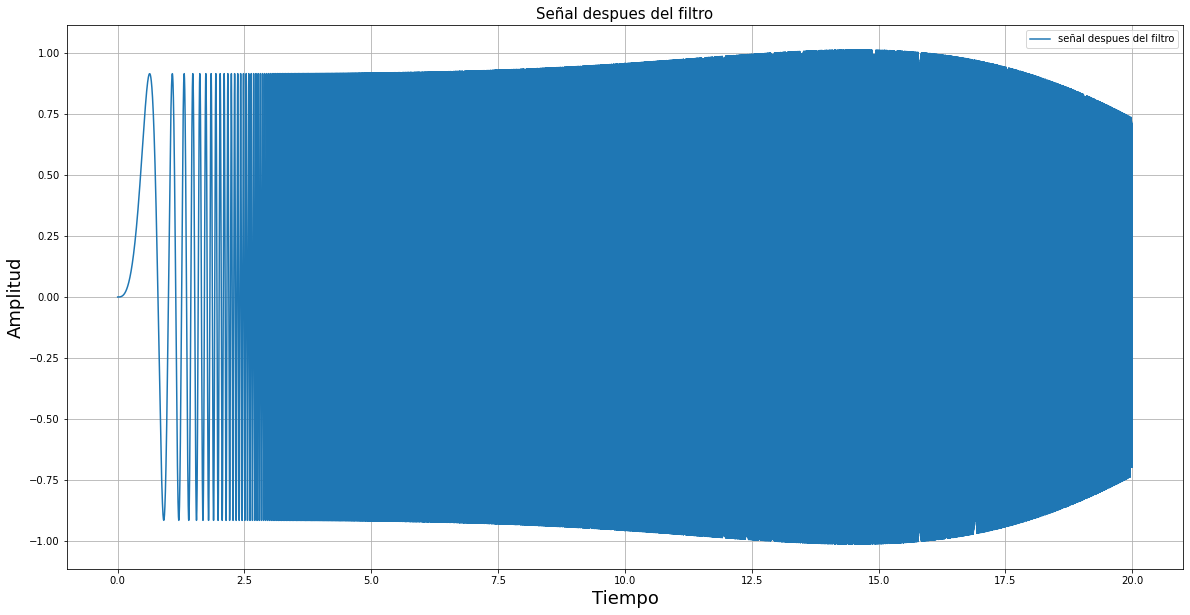

In [5]:
data2 = np.convolve(senal_fc, num, mode='same')

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,data2, label="señal despues del filtro") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal despues del filtro",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

¿Que le ocurrio a la senal?
R: podemos ver que el filtro hizo efecto, pero no se puede ver ya que el orden es muy pequeño

7. Aumente progresivamente el orden n del filtro (minimo 3 veces), repita el procedimiento anterior (items 3, 4, 5, y 6), y concluya. Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/1293238250.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal despues del filtro",FontSize=15) #titulo


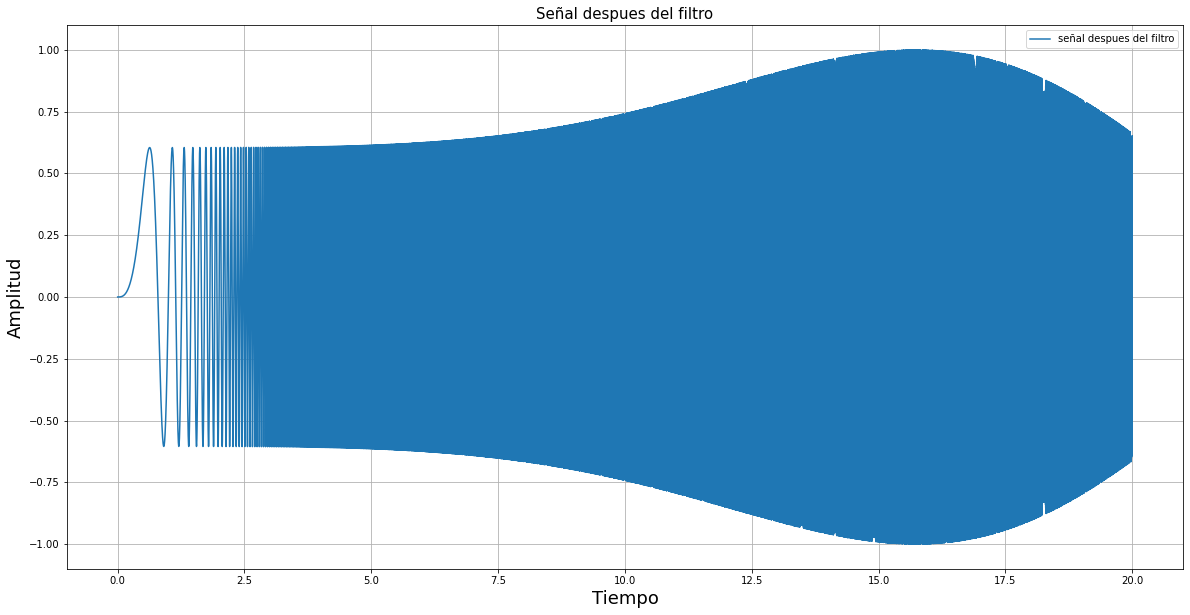

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/1293238250.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal despues del filtro",FontSize=15) #titulo


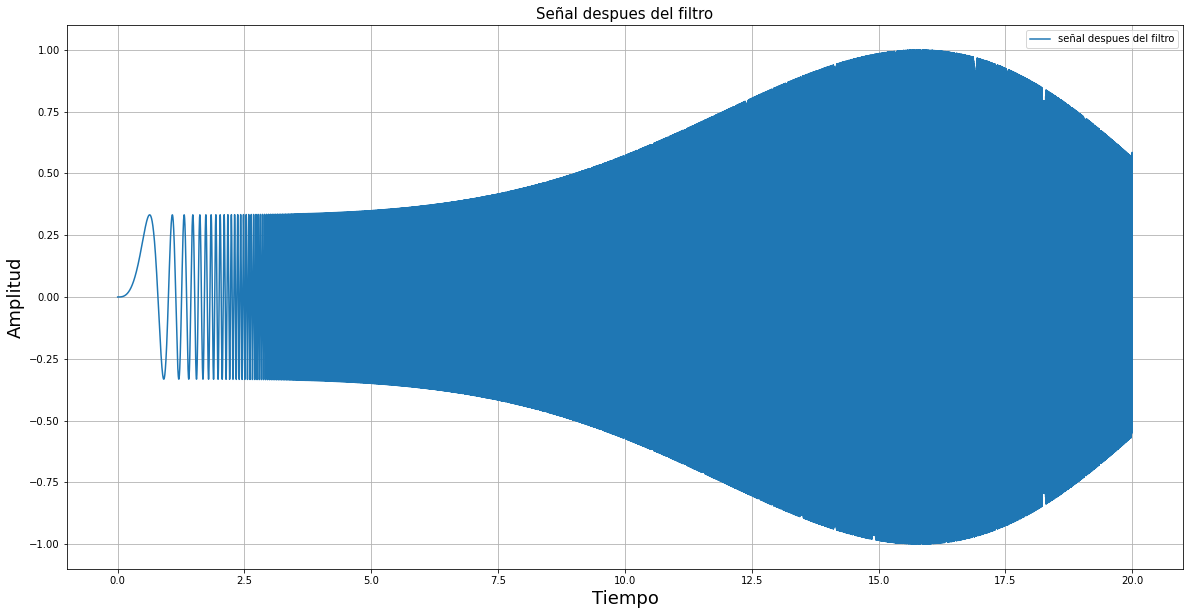

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/1293238250.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal despues del filtro",FontSize=15) #titulo


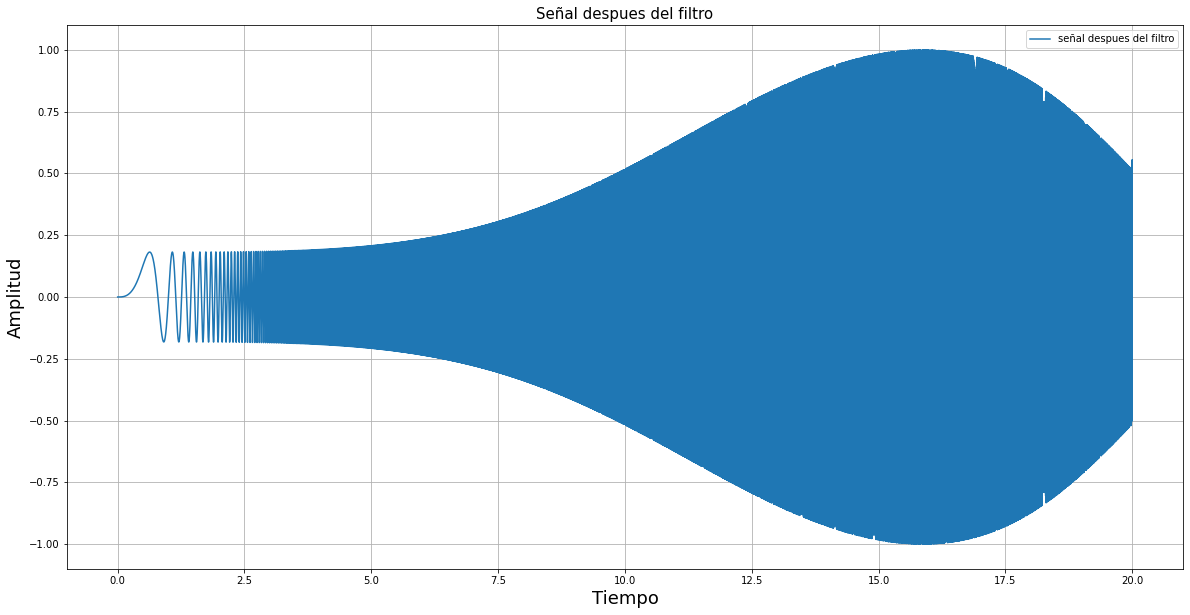

In [6]:
n = 12
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)

data2 = np.convolve(senal_fc, num, mode='same')

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,data2, label="señal despues del filtro") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal despues del filtro",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

n = 16
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)

data2 = np.convolve(senal_fc, num, mode='same')

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,data2, label="señal despues del filtro") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal despues del filtro",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

n = 20
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
data2 = np.convolve(senal_fc, num, mode='same')

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,data2, label="señal despues del filtro") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal despues del filtro",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

R: podemos ver el filtro permite pasar las un rango de frecuencias altas, cumple la funcion depasabandas

8. Genere una senal sinusoidal cuya frecuencia se vaya incrementando en el tiempo de forma cubica, la senal
debe tener la misma duracion y una frecuencia de muestreo de 4000 Hz. 
Repita los pasos 3, 4, 5 y 6. Concluyade acuerdo a las graficas obtenidas.

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/776676109.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal seno",FontSize=15) #titulo


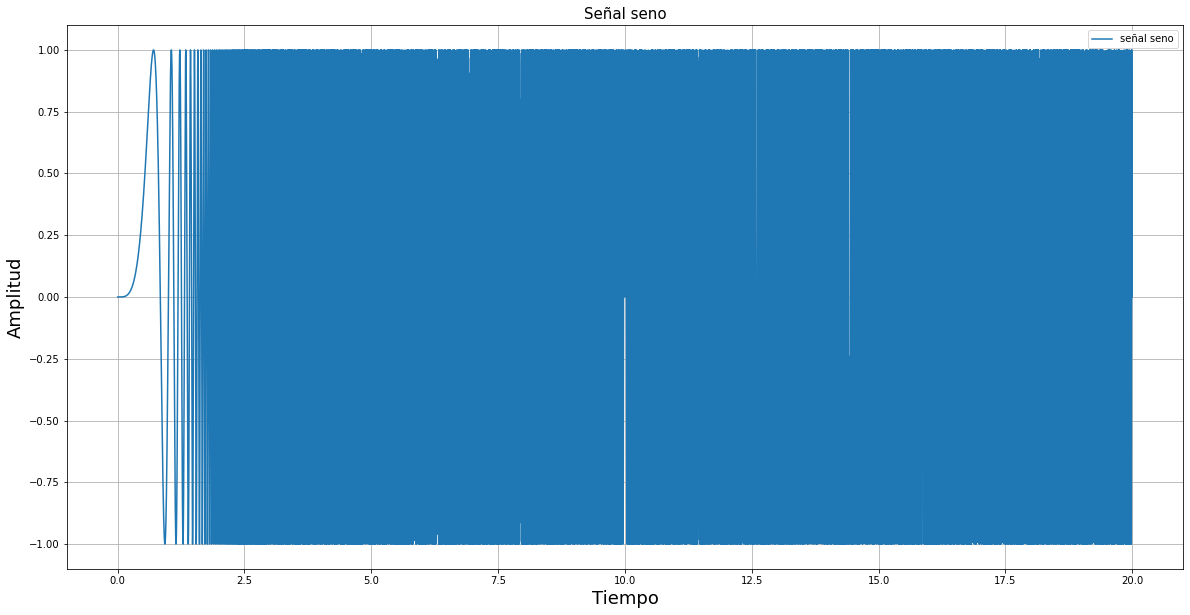

In [8]:
fs = 4000
t = np.arange(0,20,1/fs)
f = pow(t,3) #con esto hacemos que la frecuncia aumente de forma cubica
senal_fc = np.sin(2*np.pi*f*t)

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,senal_fc, label="señal seno") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal seno",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

Audio(senal_fc,rate=fs)

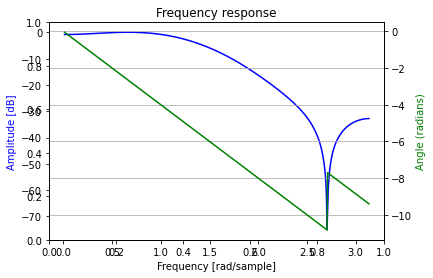

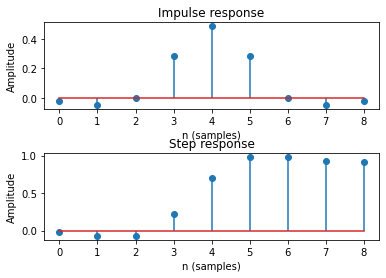

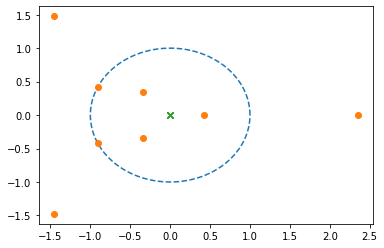

In [9]:
n = 9
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

ztrans.mfreqz(num,den); #respuesta en frecuencia y fase
ztrans.impz(num,den); #respuesta al impulso y escalon
ztrans.zeropoles(num,den); #diagrama de polos y ceros


5. ¿Que puede concluir acerca de las graficas anteriores?
¿Que tipo de filtro es?
R: Es un filtro rechazabandas
¿Cuales son las frecuencias de corte?
R: cerca de los 2.5 rad
¿Donde estan ubicados los polos y ceros?
Polos = {0}, Ceros = {2.4, 0.4} y 3 complejos en -0.4, -0.9 -1.4 aprox
¿Que puede decir de la estabilidad del filtro?
R: es causal estable

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_17864/1089208845.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal despues del filtro",FontSize=15) #titulo


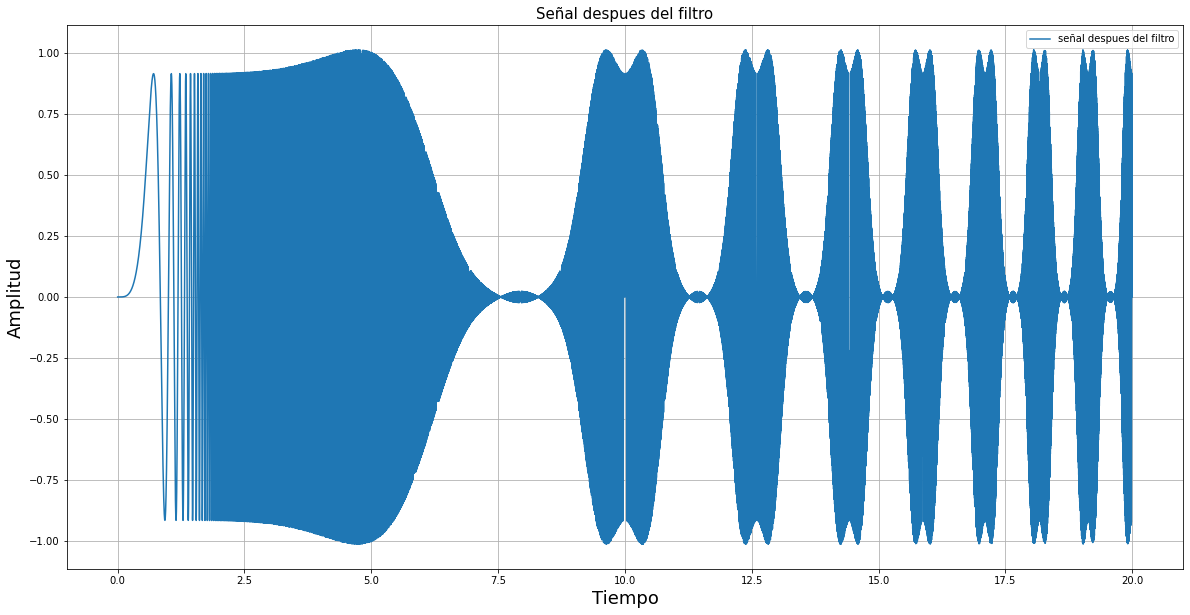

In [10]:
data2 = np.convolve(senal_fc, num, mode='same')

plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,data2, label="señal despues del filtro") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal despues del filtro",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

Concluyade acuerdo a las graficas obtenidas.
R: como la señal generada, osila entre altas y bajas frecuencias a intervalos, eso se puede ver a ya que le filtro permite pasar esas frecuencias altas cuando se presentan.

#### 4. Transformada Z
1. Retorne al sistema anterior con n = 10.

2. Use la funcion computeZ(num, den, zeros, poles, data) que se encuentra en el archivo adjunto (ztrans.py) para agregar polos y ceros a una funcion de transferencia. Observe un ejemplo a continuacion:

In [11]:
n = 10
num = signal.firwin(n, [0.1, 0.3], pass_zero=False)
den=np.zeros(n)
den[0]=1

3.Explique el comportamiento del sistema si se agrega de forma independiente:
Dos ceros conjugados de magnitud 0.8
Un polo real de magnitud 0.4

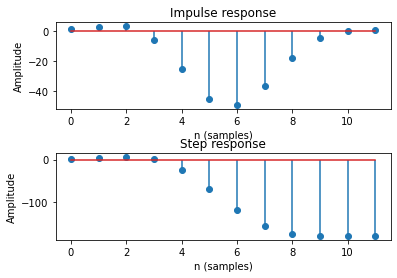

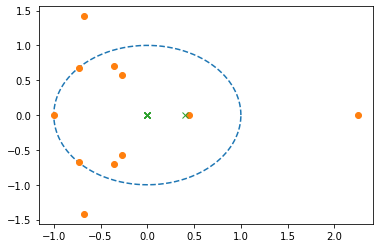

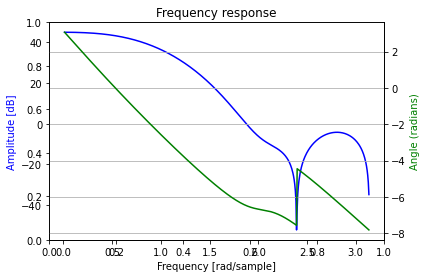

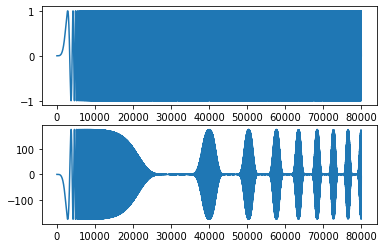

In [12]:
ztrans.computeZ(num, den, [complex(-np.sqrt(2)/4,np.sqrt(2)/2),complex(-np.sqrt(2)/4,-np.sqrt(2)/2)], [0.4] , senal_fc)

R: el filtro pierde efectividad

#### 5. Conclusiones
. Se comprende la utiidad de la trasformada z y la funcion de trasferencia para analizar un sistema discreto
. Se entiende la utilidad de los filtros digitales, donde podemos como se comprta un filtro y como nos cambia la naturaleza del filtro